# Concrete Compressive Strength Project
By : Shashidhar.B

### Introduction
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. 

### Data Source
Original Owner and Donor
  Prof. I-Cheng Yeh
  Department of Information Management 
  Chung-Hua University, 
  Hsin Chu, Taiwan 30067, R.O.C.
  e-mail:icyeh@chu.edu.tw
  TEL:886-3-5186511
  
The dataset is available at UCI Machine Learning Repository and can be downloaded from this address: http://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength
 

## Objectives

1. Univariate analysis

Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails,  missing values, outliers

2. Multivariate analysis 

Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

3. Strategies to address the different data challenges such as data pollution, outliers and missing values


4. Feature Engineering techniques

Identify opportunities (if any) to create a composite feature, drop a feature
Decide on complexity of the model, should it be simple linear mode in terms of parameters or would a quadratic or higher degree help
Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

5. create the model

Obtain feature importance for the individual features using multiple methods and present your findings

6. Tuning the model

Algorithms that you think will be suitable for this project
Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit
Model performance range at 95% confidence level

In [10]:
#For Numerial Operations numpy(Numerical Python) is used
import numpy as np

#For Data Analysis pandas(Python Data Analysis Library) is used
import pandas as pd

#For 2D graphs ploting matplotlib library is used
import matplotlib.pyplot as plt
#To enable matplotlib to plot in Jupyter Notebook
%matplotlib inline

#For better visualisation of Statistical Data seaborn library is used
import seaborn as sns

In [11]:
#To ignore warnings for exceptional handling
import warnings
warnings.filterwarnings('ignore')

#For iterator algebra
import itertools

In [12]:
#Reading the data
data=pd.read_csv("concrete.csv",sep=",")

In [13]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [14]:
data.shape

(1030, 9)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


There are totally 9 attributes of which 8 being independent and 1 dependent. 

Data is in raw form (i.e., not scaled).

All the columns are of numeric type and no categorical type found.

There are 1030 entries in all columns (no missing values).

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Summary Statistics: 

Number of instances (observations): 1030

Number of Attributes: 9

Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable

Missing Attribute Values: None    

In [17]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [18]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [19]:
(data==0).sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

The zero values are not missing values but are intensional.

### 1. Univariate analysis


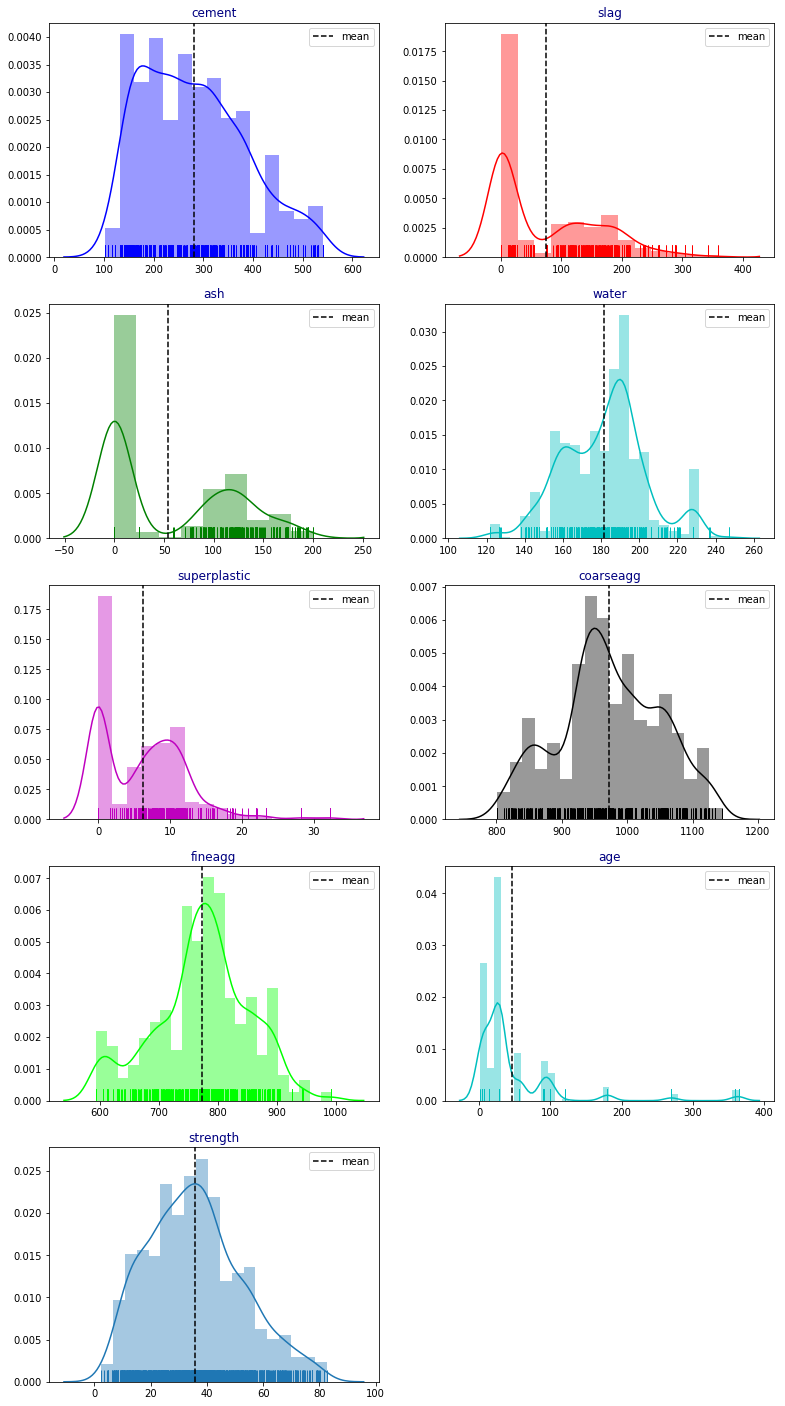

In [20]:
#distplot of all the variables
cols = [i for i in data.columns]
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(5,2,j+1)
    ax = sns.distplot(data[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")
    
plt.show()

#### 1. Cement

name in index: cement

meaning: The quantity of cement(OPC / PPC / PSC) in kg per meter cube of mixture.

data type: numeric.

unit of measurement: kg in a m3 mixture.

variable type: Independent, Input Variable.

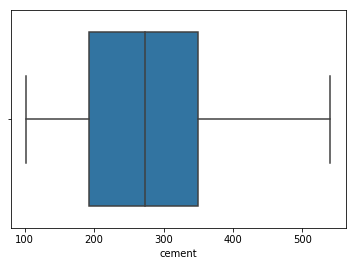

In [21]:
sns.boxplot(data['cement'])
plt.show()

mean: 281.167

1st quartile(q1): 192.375

median(q2): 272.900

3rd quartile(q3): 350

standard deviation: 104.506

analysis of the body of distributions: Slightly right-skewed Normal-distribution.

missing values: 0

range of values observed: 540(max)-102(min)= 438(Range)

outliers:

lower fence(lf)= Q1 - 1.5 IQR = 192.375-1.5*(350-192.375)= 44.06(any value lesser than lf can be considered as outlier)
          
upper fence(uf)= Q3 + 1.5 IQR = 350+1.5*(350-192.375)= 586.43(any value greater than uf can be considered as outlier)

Hence, No Outliers Present.

#### 2. Blast Furnace Slag          

name in index: slag      

meaning: The quantity of Blast Furnace Slag in kg per meter cube of mixture. This acts as a binding agent together with cement, the strenght and durability of the concrete can be increased.

data type: numeric.

unit of measurement: kg in a m3 mixture.

variable type: Independent, Input Variable.

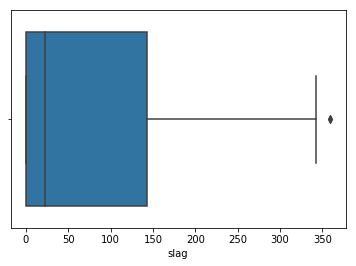

In [22]:
sns.boxplot(data['slag'])
plt.show()

mean: 73.895

1st quartile(q1): 0.000

median(q2): 22.000

3rd quartile(q3): 124.950

standard deviation: 86.279

analysis of the body of distributions: Right-Skewed Normal-distribution, 2peaks found.

missing values: 0

range of values observed:359.4-0= 359.4

outliers: 

uf= 142.950+1.5*(142.950-0)= 357.375

There are 2 entries present in uf.

#### 3. Fly Ash                     

name in index: ash

meaning: The quantity of Fly Ash in kg per meter cube of mixture. This is also a binding agent, the strenght and duarability of the concrete increases. But the hardening process time increases.

data type: numeric.

unit of measurement: kg in a m3 mixture.

variable type: Independent, Input Variable.

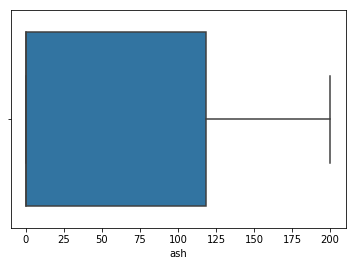

In [23]:
sns.boxplot(data['ash'])
plt.show()

mean: 54.188

1st quartile(q1): 0.00

median(q2): 0.00

3rd quartile(q3): 118.300

standard deviation: 63.997

analysis of the body of distributions: Right-Skewed Normal-distribution, 2peaks found.

missing values: 0

range of values observed: 200.1-0= 200.1

outliers: not present

#### 4. Water                      

name in index: water

meaning: The quantity of Water(based on the grade of concrete required) in kg per meter cube of mixture. The water to cement ratio plays a major role in the concrete strenght.

data type: numeric.

unit of measurement: kg in a m3 mixture.

variable type: Independent, Input Variable.

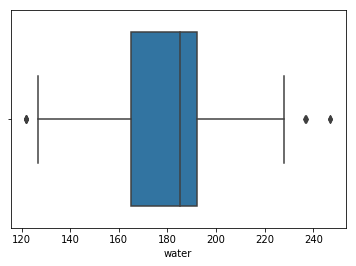

In [24]:
sns.boxplot(data['water'])
plt.show()

mean: 181.567

1st quartile(q1): 164.900

median(q2): 185.000

3rd quartile(q3): 192.000

standard deviation: 21.354

analysis of the body of distributions: Slightly Left-skewed Normal-distribution, 3 peaks found.

missing values: 0

range of values observed: 247-121.80= 125.2

outliers:

lf= 164.9-1.5*(192-164.9)= 124.26 and lesser

uf= 192+1.58(192-164.9)= 232.65 and greater

Hence, Outliers present on both lf and uf.

#### 5. Superplasticizer            

name in index: superplastic

meaning: The quantity of Superplasticizer in kg per meter cube of mixture. Superplasticizer are used to ensure better flow properties because they minimize particle segregation. Further, they allow to decrease the water-cement ratio which leads to higher compressive strength.

data type: numeric.

unit of measurement: kg in a m3 mixture.

variable type: Independent, Input Variable.

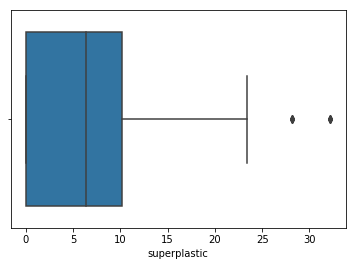

In [25]:
sns.boxplot(data['superplastic'])
plt.show()

mean: 6.204

1st quartile(q1): 0

median(q2): 6.4

3rd quartile(q3): 10.2

standard deviation: 5.973

analysis of the body of distributions: Right-skewed Normal-distribution, 2peaks found.

missing values: 0

range of values observed: 32.2-0= 32.2

outliers: presnt on ul= 10.2+1.5*(10.2-0)= 25.5 and greater

#### 6. Coarse Aggregate           

name in index: coarseagg

meaning: The quantity of Coarse Aggregate(20mm, 12.5mm) in kg per meter cube of mixture.

data type: numeric.

unit of measurement: kg in a m3 mixture.

variable type: Independent, Input Variable.

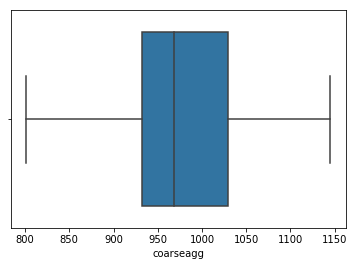

In [26]:
sns.boxplot(data['coarseagg'])
plt.show()

mean: 972.918

1st quartile(q1): 932

median(q2): 968

3rd quartile(q3): 1029.4

standard deviation: 77.753

analysis of the body of distributions: slightly left-skewed Normal-dritribution, multiple peaks found.

missing values: 0

range of values observed: 1145-801= 344

outliers: nill

#### 7. Fine Aggregate

name in index: fineagg

meaning: The quantity of Fine Aggregate(Manufactured Sand , River Sand) in kg per meter cube of mixture.

data type: numeric, quantitative.

unit of measurement: kg in a m3 mixture.

variable type: Independent, Input Variable.

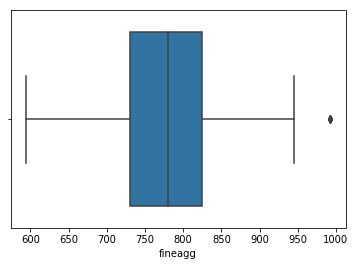

In [27]:
sns.boxplot(data['fineagg'])
plt.show()

mean: 773.580

1st quartile(q1): 730.950

median(q2): 779.500

3rd quartile(q3): 824.0

standard deviation: 80.175

analysis of the body of distributions: slightly left-skewed Normally-distributed, 3 peaks found.

missing values: 0

range of values observed: 992.6-597.0= 395.6

outliers: found on ul= 824+1.5*(824-730.950)= 963.575 and greater.

#### 8. Age               

name in index: age

meaning: The aging of the concrete mixture in days.Concrete hardens with time and strength increases. Usually, concrete is tested after 28 days.

data type: numeric.

unit of measurement:  Day (1~365).

variable type: Independent, Input Variable.

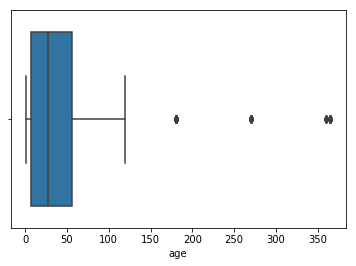

In [28]:
sns.boxplot(data['age'])
plt.show()

mean: 45.662

1st quartile(q1): 7

median(q2): 28

3rd quartile(q3): 56

standard deviation: 63.169

analysis of the body of distributions: right-skewed normal-distribution.

missing values: 0

range of values observed: 365-1= 364

outliers: found on ul=56+1.5*(56-7)= 129.5 and greater values.

#### 9. Concrete compressive strength 

name in index: strength

meaning: The Compressive strength of the concrete mixture aged for specific days.Compressive strength is the capacity of a material or structure to withstand loads tending to reduce size.compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades.

data type: numeric.

unit of measurement: MegaPascal(MPa).

variable type: Dependent, Output Variable.

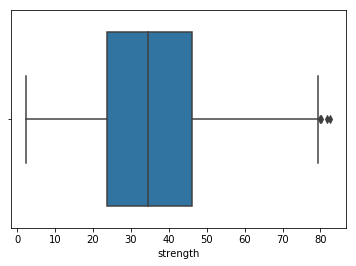

In [29]:
sns.boxplot(data['strength'])
plt.show()

mean: 35.817

1st quartile(q1): 23.710

median(q2): 34.445

3rd quartile(q3): 46.135

standard deviation: 16.705

analysis of the body of distributions: very slightly right-skewed normally-distributed 

missing values: 0

range of values observed: 82.6-2.33= 80.27

outliers: found on ul= 46.135+1.5*(46.135-23.710)= 79.772 and greater values

#### Univariate Analysis Inference
Skew in the Normal distribution indicates the presence of the outliers.

The multiple gaussian peaks indicates the presence of different clusters in the distribution. The maximum peaks found is 3 on couple of attributes, which indicates that we can find around 3*3= 9 clusters of data distribution.

well, boxplot clearly indicates the presence of outliers.

Let us deal with the above accordingly while data cleaning and transforming.

### 2. Multivariate analysis

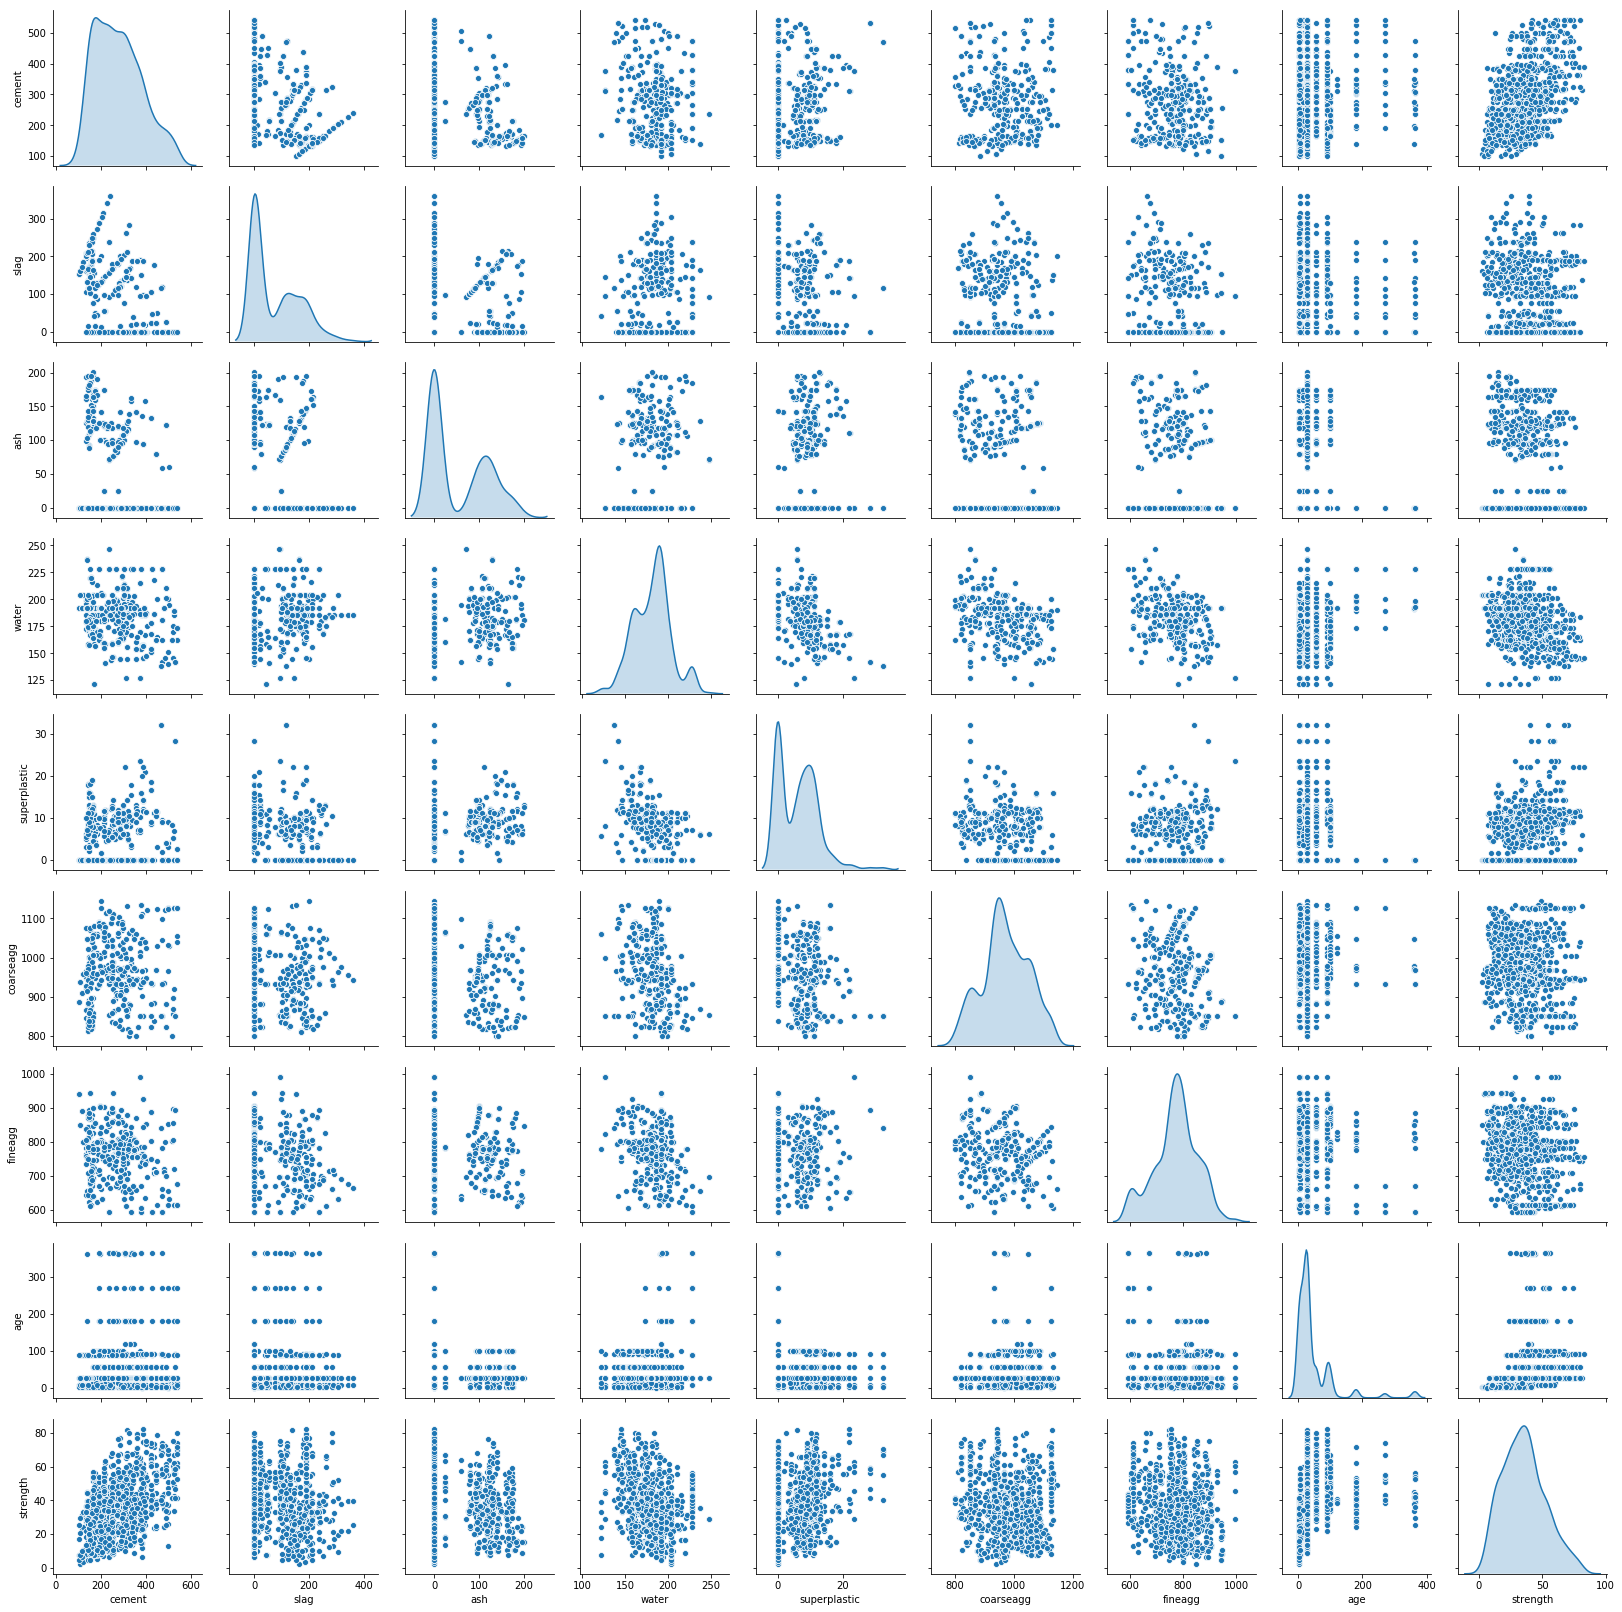

In [30]:
sns.pairplot(data, diag_kind = 'kde')
plt.show()

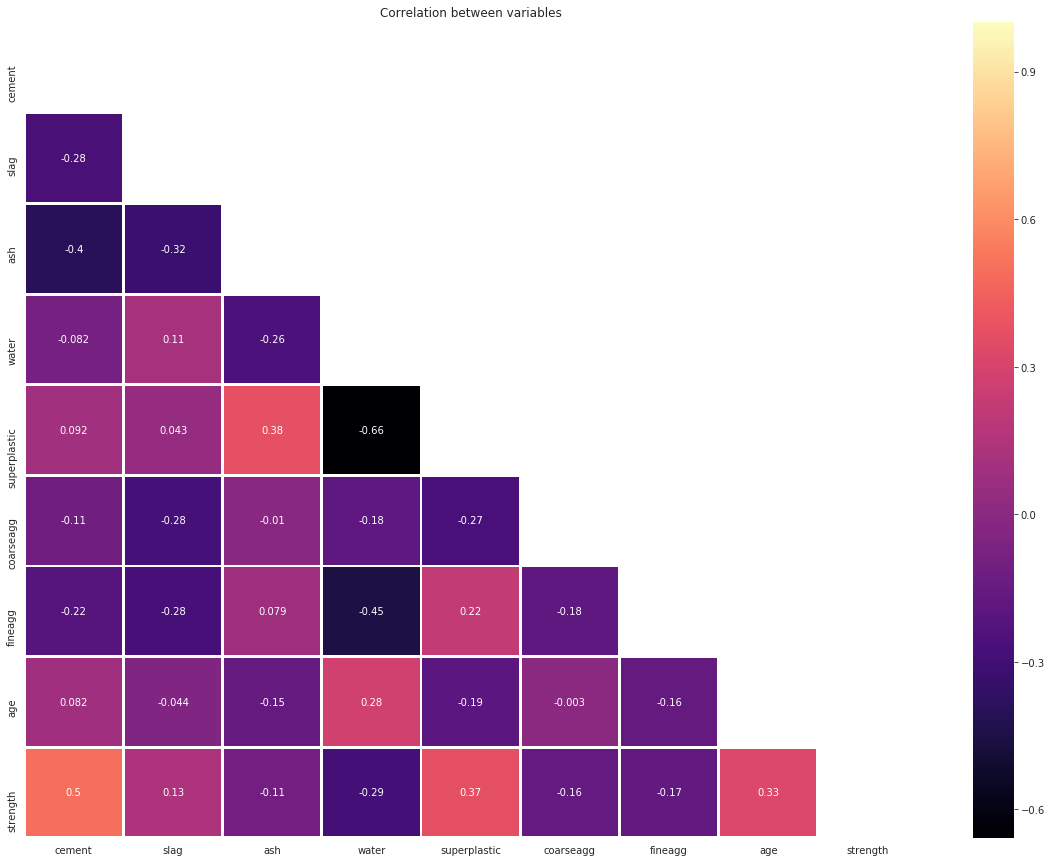

In [31]:
#Let's see how these data are correlated
cor = data.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,15))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,mask = mask,cmap="magma")
plt.title("Correlation between variables")
plt.show()

1.cement has,

negative co-relation with slag and ash.

neutral with coarseagg, fineagg.

strong positive co-reation with strength.

increasing and later decreasing trend with superplastic, water and age.



2.slag has,        

negative co-relation with cement, ash, coarseagg and fineagg.

negative to neutral with water, superplastic and age.

neutral to positive co-reation with strength.



3.ash has,            

negative co-relation with slag and cement.

neutral with coarseagg, fineagg.

positive co-reation with water, fineagg, coarseagg and superplastic. i.e, with all binding agents.



4.water has,         

highly negative co-relation with superplastic.

increasingle negative with all other attributes except age.

increasingly positive co-reation with age. since as water increases the setting time also increases.



5.superplastic has,   

negative co-relation with age and water.

apart from age and water it has neutral to increasing relation with others.

and positive corelation with the ash,strength.



6.coarseagg has,      

almost neutral to positive trend with ash, water and superplastic at midrange but negative at the top.

negative to neutral relationship with other attributes.

This attribute can be dropped.



7.fineagg has,        

negative co-relation with water.

neutral to positive with ash and superplastic.



8.age has,           

negative co-relation with almost all atrributes.

neutral to positive with coarseagg.

positive co-reation with water.

the strength increases gradually and falls as the age increases.



9.strength has,

positive co-reation with cement, superplastic and age.

water has more negative impact then others.

almost neutral with all others.


From above correlation plots we can note that, 

There are no attributes which are highly co-related.

cement, superplastic and age are positively corelated with strength, i.e, increase in quantity increases the strength. But as the age increases too much the strenght start to decrease. 

it can be found that for fine aggregation mixture ash, fineagg and superplastic make good binders, but not the water.

on the contarary water goes well with the coarse aggregation.

### 3. Strategies to address the different data challenges such as data pollution, outliers and missing values

In [32]:
#In univariate analysis we have identified the presence of the outliers 

# Lets drop outliers by 1.5 IQR

cust_data=data
def get_subset_by_IQR(cust_data,column):
    q1 = cust_data[column].quantile(0.25)
    q3 = cust_data[column].quantile(0.75)
    IQR = q3 - q1
    q1 = q1 - IQR*1.5
    q3 = q3 + IQR*1.5
    iqr = (cust_data[column] > q1) & (cust_data[column] < q3)
    return cust_data.loc[iqr]

for col in cust_data:
    before = cust_data.shape[0]
    cust_data = get_subset_by_IQR(cust_data, col)
    after = cust_data.shape[0]
    print("On", col, "column, Dropped:", (before-after), "entries")

On cement column, Dropped: 0 entries
On slag column, Dropped: 2 entries
On ash column, Dropped: 0 entries
On water column, Dropped: 9 entries
On superplastic column, Dropped: 10 entries
On coarseagg column, Dropped: 0 entries
On fineagg column, Dropped: 35 entries
On age column, Dropped: 44 entries
On strength column, Dropped: 4 entries


In [33]:
cust_data.shape

(926, 9)

1030-926= 104 rows, Which is huge and loosing them will be huge loss of information.

age column takes the major chunk of the numbers but it is not an outlier, since it has been declared in the information section that age column consists of range from 1-365 in days.

Since the dataset is an experiment of different combinations of the ingredients to obtain specific strength of the concrete mixture, outliers are all experimental information.

Hence, treating outliers is not advisable.

In [34]:
#Is Data-Scaling required?
max_of_max= data.max().max()
min_of_max= data.max().min()
if max_of_max/min_of_max>=2:
    print("Data-Scaling is suggested")
else:
    print("Data-Scaling is not suggested")

Data-Scaling is suggested


###### * Above is my own logic suggestions and feedback appreciated *

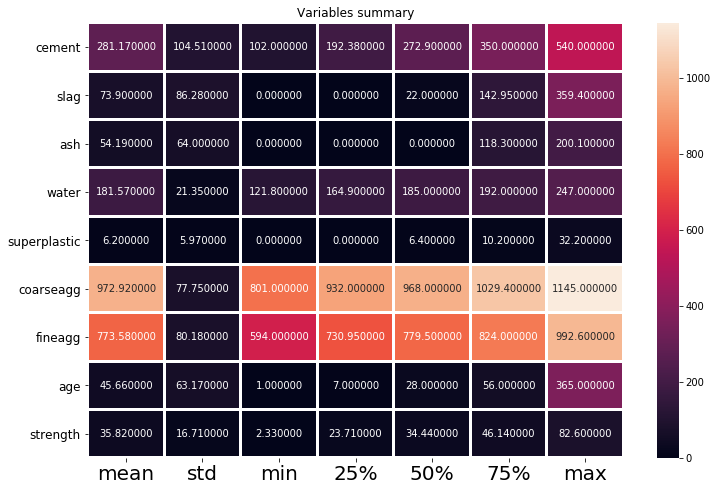

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

All of the independent variables are in same measuring units except age.

The attributes coarseagg and fineagg have their values on the higher side of the scale.

The attributes slag, ash, age and strenght have their values on the lower end of the scale.

The differences between these attributes are high. Hence scaling is required to ease the model.

The independent columns may not be directly corelated to each other, but induvidally they play a vital role in obtaining a specific strength of the concrete both theoretically and also stastically contain vital information and hence, droping any attribute is not at all a good idea. Since data set is porne to loose valuable information.

### 4. Feature Engineering techniques

#### Concrete Strength vs Independent variables
There are some kind of flow from negative to neutral, neutral to positive trend found in between the attributes and some trends in-between and could not make much sense out of it, which may be due to the following,

Concrete's compressive strength requirements can vary for different purposses, let us consider them in 3 categories for the study sake.

usually the residential structures requrement is of range 17MPa to 28MPa. So let us consider categories of;

Binning compressive strength in 3 categories;

category Low - mpa less than 17.

category Medium - mpa in between 17 to 28.

category High - mpa greater than 28.

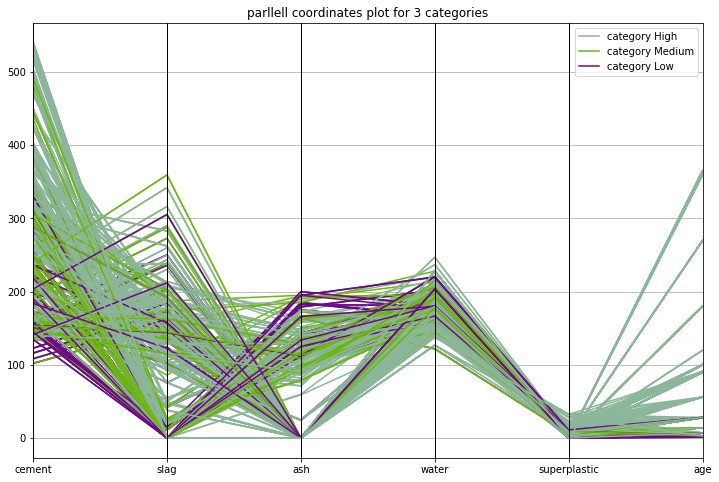

In [36]:
data2  =  data.copy()

def lab(data2):
    if data2["strength"] <= 17:
        return "category Low"
    if data2["strength"] >17 and data2["strength"] <= 28 :
        return "category Medium"
    if data2["strength"] >28 :
        return "category High "
    
data2["compressive_strength_category"] = data2.apply(lambda data2:lab(data2) ,axis =1)

from pandas.plotting import parallel_coordinates

cols1 = ['cement', 'slag','ash', 'water','superplastic','age',"compressive_strength_category"]

plt.figure(figsize=(12,8))
parallel_coordinates(data2[cols1],"compressive_strength_category")
plt.title("parllell coordinates plot for 3 categories")
plt.show()

From above we see the corelation of the attributes relating to the different categories of the concrete.

slag value seems to increases the strength of the concrete from low to medium, further from medium to high and later drops and settles to medium or high with much more increase in the slag quantity.

increase in ash quantity is inversly proportinal to strength.

quantities of cement, superplastic and age are directly proportional to the strength of the concrete.

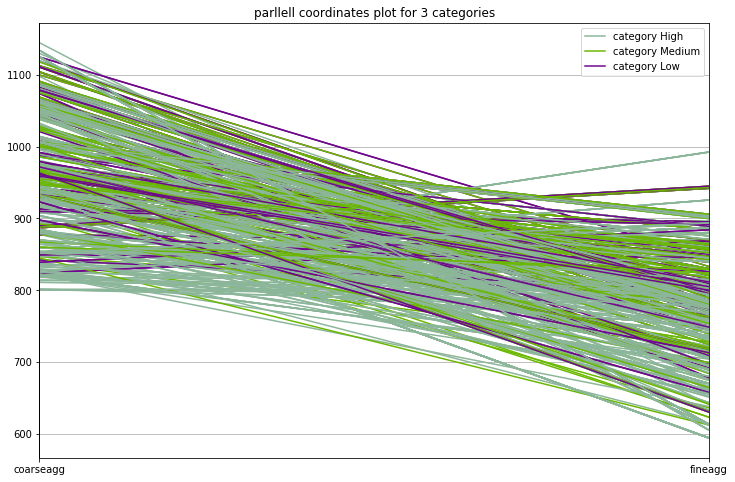

In [37]:
def lab(data2):
    if data2["strength"] <= 17:
        return "category Low"
    if data2["strength"] >17 and data2["strength"] <= 28 :
        return "category Medium"
    if data2["strength"] >28 :
        return "category High "
    
data2["compressive_strength_category"] = data2.apply(lambda data2:lab(data2) ,axis =1)

from pandas.plotting import parallel_coordinates

cols1 = ['coarseagg','fineagg',"compressive_strength_category"]

plt.figure(figsize=(12,8))
parallel_coordinates(data2[cols1],"compressive_strength_category")
plt.title("parllell coordinates plot for 3 categories")
plt.show()

There is no much clear reference in both of these attributes.

They are not in any corelation with the grades of concrete obtained.

These columns can be dropped.

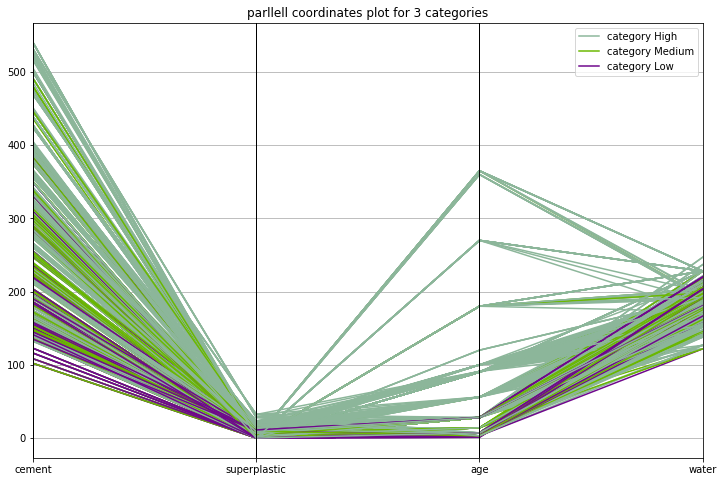

In [38]:
def lab(data2):
    if data2["strength"] <= 17:
        return "category Low"
    if data2["strength"] >17 and data2["strength"] <= 28 :
        return "category Medium"
    if data2["strength"] >28 :
        return "category High "
    
data2["compressive_strength_category"] = data2.apply(lambda data2:lab(data2) ,axis =1)

from pandas.plotting import parallel_coordinates

cols1 = ['cement','superplastic','age','water',"compressive_strength_category"]

plt.figure(figsize=(12,8))
parallel_coordinates(data2[cols1],"compressive_strength_category")
plt.title("parllell coordinates plot for 3 categories")
plt.show()

we can see that the higher values of the above attributes has a significant increase to category High strength. 

But only water as an ambiguity, at times it is failing to increase the strenght after increasing its quantity.

There is definitely a scope to create new columns out of existing like,

The attributes used as binders together can be off as a new column. i.e,(ash, fineagg, coarseagg and superplastic).

The binders together with water can be of another attribute.

water to binders ratio, water to aggregation ratio can be of attribute with more information.

fineagg and coarseagg attributes can be deleted.

But insted if needed, PCA will be better option than complicating the model or loosing some information, since the data is not too huge, it wont be any problem in executing the models.

### 5. create the model and tuning

In [39]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = data['strength']
X = data.loc[:, data.columns != 'strength']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

In [40]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns = X_train.columns)
X_train_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-0.448711,-0.879090,1.072130,-0.373869,0.084141,1.070423,0.087184,-0.502115
1,1.570641,-0.606933,0.406889,-0.938627,0.905081,-0.085519,-0.738515,-0.674247
2,-1.540405,1.082708,-0.826775,0.473269,-1.038368,-0.825115,1.495219,0.687160
3,2.079721,-0.879090,-0.826775,0.849775,-1.038368,1.957421,-1.967752,-0.674247
4,1.372665,0.326338,-0.826775,-1.338665,1.726020,-1.571176,1.435620,-0.611653


In [41]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, X, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, X, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, X, y, cv=cv, scoring='r2').mean())
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train_scaled, y_train)

In [43]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,10.478385,0.607800
1,Ridge Regression,10.477134,0.607872
2,Lasso Regression,11.064264,0.563884
3,K Neighbors Regressor,9.740363,0.662140
4,Decision Tree Regressor,7.676232,0.779451
5,Random Forest Regressor,6.069014,0.869478
6,Gradient Boosting Regressor,5.355314,0.897422
7,Adaboost Regressor,8.088120,0.775239


## Conclusion

From above it can be found that Gradient Boosting Regressor gives 89.7422% accuracy with Root Mean Square Error (RMSE) of 5.36.